In [1]:
from TensorHelpers import *
from QFT import *
from MPS import *

import numpy as np
from qiskit.visualization import array_to_latex


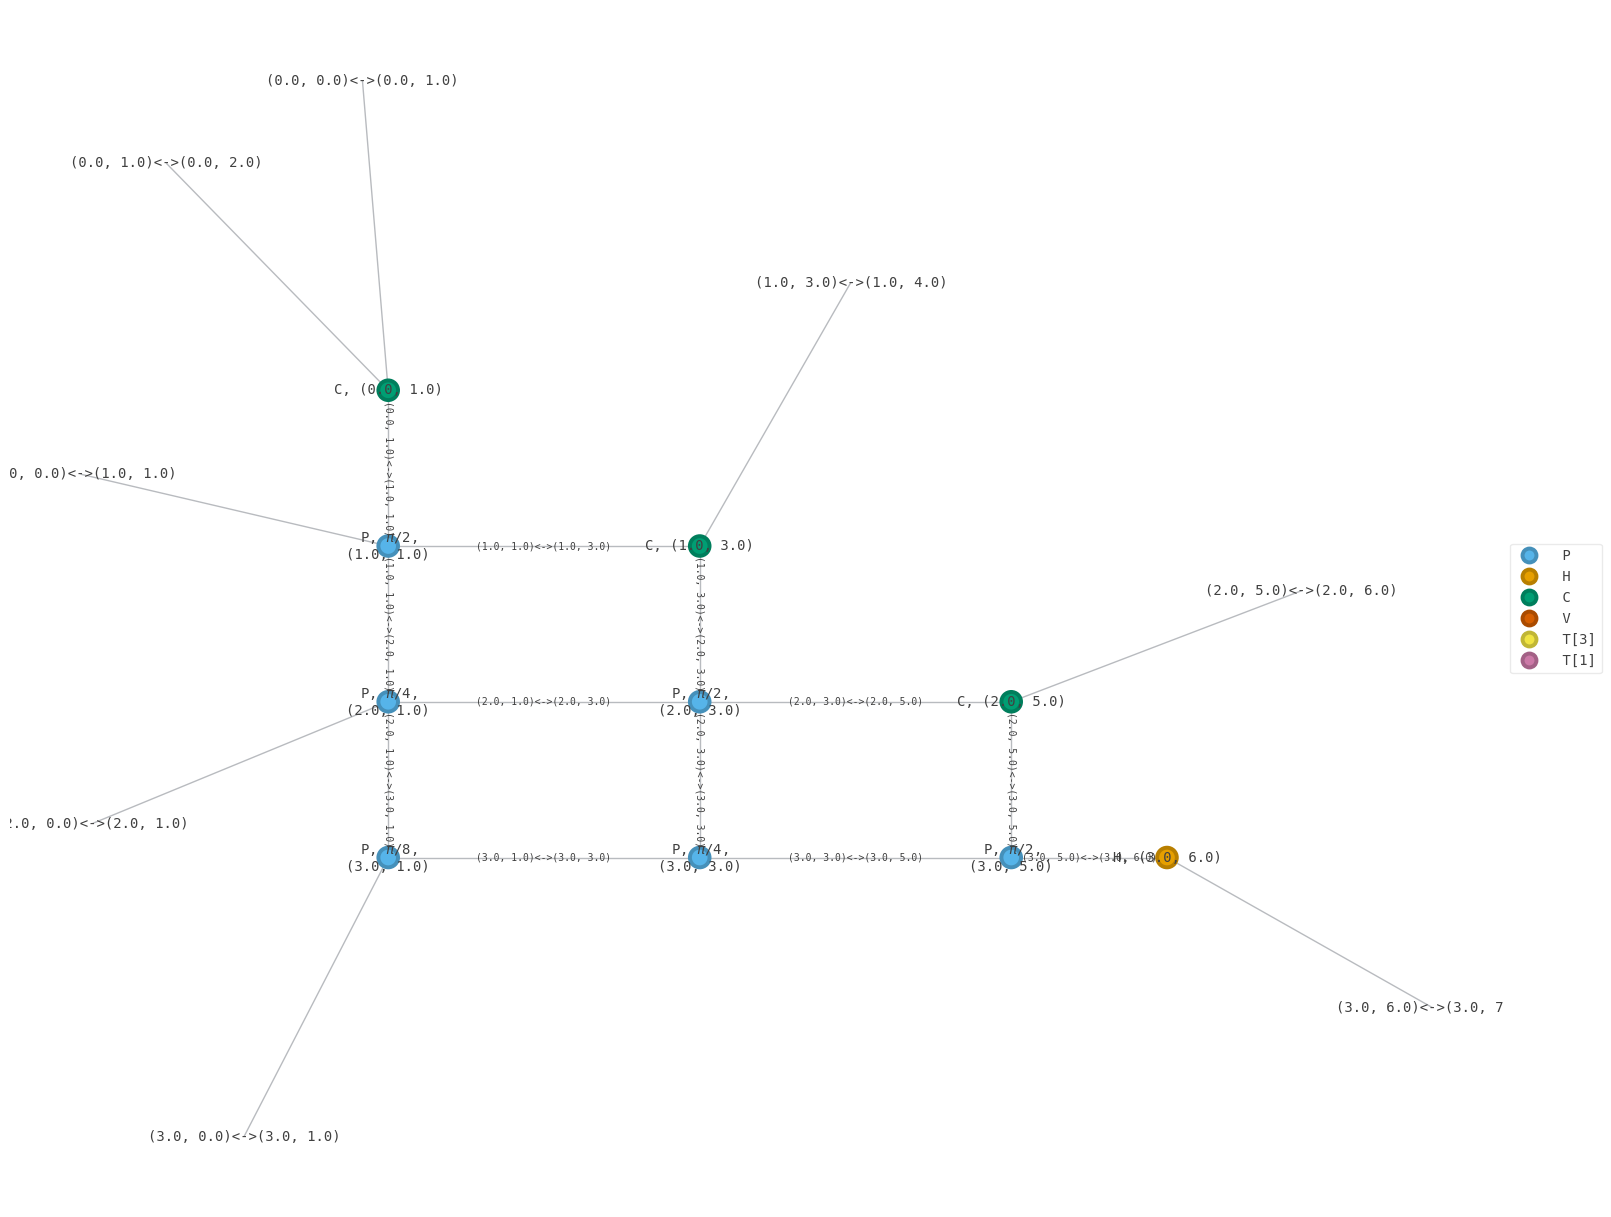

Tensor shape: (2, 2, 2)
Tensor: Tensor(shape=(2, 2, 2), inds=('(0.0, 1.0)<->(1.0, 1.0)', '(0.0, 1.0)<->(0.0, 2.0)', '(0.0, 0.0)<->(0.0, 1.0)'), tags=oset(['(0.0, 0.0)', 'U[0]']), backend='numpy', dtype='float64')
Tensor Data:
 [[[ 0.70710678  0.        ]
  [ 0.70710678  0.        ]]

 [[ 0.          0.70710678]
  [ 0.         -0.70710678]]]
Tensor shape: (2, 2, 2, 4)
Tensor: Tensor(shape=(2, 2, 2, 4), inds=('_8f20e7AAAAZ', '(1.0, 3.0)<->(1.0, 4.0)', '(0.0, 1.0)<->(1.0, 1.0)', '(1.0, 0.0)<->(1.0, 1.0)'), tags=oset(['(1.0, 0.0)', 'U[1]']), backend='numpy', dtype='complex128')
Tensor Data:
 [[[[-2.22044605e-16-1.47424196e-17j  4.99159877e-01-2.89726986e-02j
    -1.13759645e-01-1.73956245e-01j  4.39893669e-01+1.15288888e-01j]
   [-1.95443151e-16-1.47424196e-17j  4.99159877e-01-2.89726986e-02j
    -1.13759645e-01-1.73956245e-01j  4.39893669e-01+1.15288888e-01j]]

  [[ 5.72072628e-17-1.86572718e-17j  3.98939900e-01-3.01408288e-01j
     1.91232600e-01+8.14378589e-02j -4.29809293e-01+1.4853262

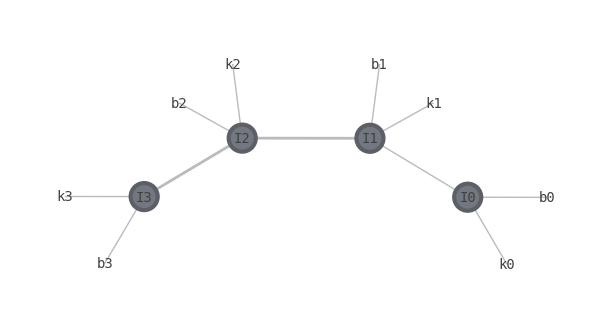

In [14]:
QFT_MPO = QFT(4)
QFT_MPO.create_circuit()
QFT_MPO.draw()
mpo = QFT_MPO.create_MPO(max_bond_dim=-1, cutoff=1e-15, verbose=False, reverse=False)

mpo.draw()

# Comparing MPS

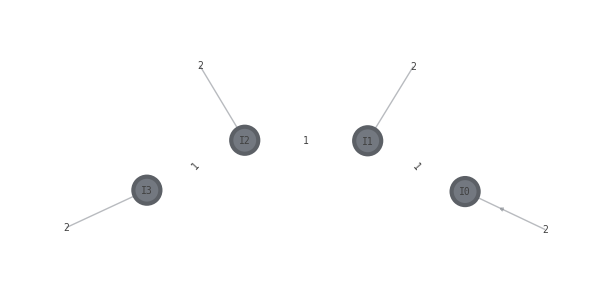

(2, 1)
[[-0.70710678-5.21087597e-17j]
 [ 0.70710678-8.29203642e-17j]]

(1, 2, 1)
[[[0.70710678+0.j        ]
  [0.        +0.70710678j]]]

(1, 2, 1)
[[[0.70710678+0.j ]
  [0.5       +0.5j]]]

(1, 2)
[[-1.41421356+0.j        -1.30656296-0.5411961j]]



In [15]:
QFT_mps = MPS(4)


mps = QFT_mps.create_MPS(
    [lambda x: np.exp(2j*np.pi*x)/2], 
    0, 
    1.0, 
    max_bond=4,
    cutoff=1e-15
)

mps.draw(show_inds='bond-size')
for t in mps.tensors_sorted():
    print(t.shape)
    print(t.data, end='\n\n')

In [16]:
python_mps_res = mps.to_dense().reshape((16,))
print(python_mps_res.shape)
print(python_mps_res)

(16,)
[ 5.00000000e-01+3.68464574e-17j  4.61939766e-01+1.91341716e-01j
  3.53553391e-01+3.53553391e-01j  1.91341716e-01+4.61939766e-01j
 -3.68464574e-17+5.00000000e-01j -1.91341716e-01+4.61939766e-01j
 -3.53553391e-01+3.53553391e-01j -4.61939766e-01+1.91341716e-01j
 -5.00000000e-01+5.86335519e-17j -4.61939766e-01-1.91341716e-01j
 -3.53553391e-01-3.53553391e-01j -1.91341716e-01-4.61939766e-01j
 -5.86335519e-17-5.00000000e-01j  1.91341716e-01-4.61939766e-01j
  3.53553391e-01-3.53553391e-01j  4.61939766e-01-1.91341716e-01j]


In [17]:
julia_mps_res = np.array([0.4999999999999996 + 2.9314579421307735e-17j, 0.4619397662556433 + 0.19134171618254486j, 0.3535533905932737 + 0.3535533905932735j, 0.19134171618254503 + 0.46193976625564337j, -4.0491443498878406e-17 + 0.49999999999999944j, -0.1913417161825448 + 0.46193976625564315j, -0.3535533905932734 + 0.35355339059327356j, -0.46193976625564326 + 0.19134171618254495j, -0.49999999999999967 + 6.568865448039731e-17j, -0.46193976625564337 - 0.1913417161825448j, -0.3535533905932738 - 0.3535533905932735j, -0.19134171618254514 - 0.4619397662556434j, -5.451179040282661e-17 - 0.4999999999999995j, 0.19134171618254475 - 0.4619397662556432j, 0.3535533905932734 - 0.3535533905932737j, 0.46193976625564326 - 0.19134171618254509j])

julia_mps_res = julia_mps_res.reshape((16,))
print(julia_mps_res.shape)
print(julia_mps_res)

(16,)
[ 5.00000000e-01+2.93145794e-17j  4.61939766e-01+1.91341716e-01j
  3.53553391e-01+3.53553391e-01j  1.91341716e-01+4.61939766e-01j
 -4.04914435e-17+5.00000000e-01j -1.91341716e-01+4.61939766e-01j
 -3.53553391e-01+3.53553391e-01j -4.61939766e-01+1.91341716e-01j
 -5.00000000e-01+6.56886545e-17j -4.61939766e-01-1.91341716e-01j
 -3.53553391e-01-3.53553391e-01j -1.91341716e-01-4.61939766e-01j
 -5.45117904e-17-5.00000000e-01j  1.91341716e-01-4.61939766e-01j
  3.53553391e-01-3.53553391e-01j  4.61939766e-01-1.91341716e-01j]


## Comparing norms of both

In [18]:
np.linalg.norm(julia_mps_res - python_mps_res)

1.8716351571156187e-15

In [19]:
res = mps.contract()
print(res.data)

[[[[ 5.00000000e-01+3.68464574e-17j  4.61939766e-01+1.91341716e-01j]
   [ 3.53553391e-01+3.53553391e-01j  1.91341716e-01+4.61939766e-01j]]

  [[-3.68464574e-17+5.00000000e-01j -1.91341716e-01+4.61939766e-01j]
   [-3.53553391e-01+3.53553391e-01j -4.61939766e-01+1.91341716e-01j]]]


 [[[-5.00000000e-01+5.86335519e-17j -4.61939766e-01-1.91341716e-01j]
   [-3.53553391e-01-3.53553391e-01j -1.91341716e-01-4.61939766e-01j]]

  [[-5.86335519e-17-5.00000000e-01j  1.91341716e-01-4.61939766e-01j]
   [ 3.53553391e-01-3.53553391e-01j  4.61939766e-01-1.91341716e-01j]]]]


# Comparing MPS applied to MPO

## MPO applied to MPS

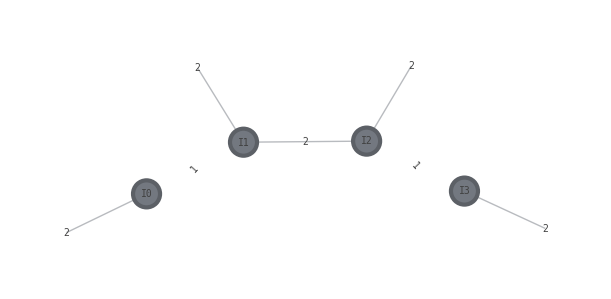

In [20]:
mpo_mps_res = mpo.apply(mps, compress=True)
mpo_mps_res.draw(show_inds='bond-size')

In [21]:
for t in mpo_mps_res.tensors:
    print(t.shape)
    print(t.data, end='\n\n')

(1, 2)
[[5.55111512e-16+3.33066907e-16j 1.01579902e+00+2.36247291e+00j]]

(1, 2, 2)
[[[ 0.68927711+0.14671644j -0.59113671+0.38364833j]
  [-0.05403105-0.02126021j -0.05323896+0.02317249j]]]

(2, 1, 2)
[[[ 1.        +0.j          0.        +0.j        ]]

 [[-0.        +0.j          0.58123819-0.81373347j]]]

(1, 2)
[[0.70710678+0.j         0.65328148-0.27059805j]]



## Comparing MPS applied to MPO results

In [22]:
python_mpo_mps_res = mpo_mps_res.to_dense().reshape(16,)[::-1]
print(python_mpo_mps_res)

[-8.77883256e-02+5.86582838e-02j -1.03553391e-01+2.05980501e-02j
 -1.25683487e+00-2.50000000e-01j -1.06549316e+00-7.11939766e-01j
 -1.03553391e-01-2.05980501e-02j -8.77883256e-02-5.86582838e-02j
  7.11939766e-01+1.06549316e+00j  2.50000000e-01+1.25683487e+00j
 -9.29949200e-18+2.48989218e-17j -1.81200152e-17+1.94448428e-17j
 -2.93497810e-16+1.33877510e-16j -3.22389324e-16+1.13699422e-17j
 -2.41819303e-17+1.10304626e-17j -2.65623658e-17+9.36794557e-19j
  3.02199987e-16+1.12868596e-16j  2.36003441e-16+2.19923914e-16j]


In [23]:
array_to_latex(python_mpo_mps_res, precision=10, max_size=16)

<IPython.core.display.Latex object>

In [12]:
julia_mpo_mps_res = np.array([-1.4125382779160973e-16 - 2.148364964292212e-16j, 1.9999999999999956 + 6.106226635438361e-16j, -3.7655715704724443e-32 + 7.677085248059193e-33j, 1.1102230246251593e-16 - 2.7755575615628953e-16j, 3.0373981422218387e-32 - 1.2672912130365601e-31j, 6.938893903907234e-16 + 7.389922007661208e-16j, -1.5901103869005045e-47 - 1.1250116108652164e-47j, 1.4107436842636575e-31 - 5.527418940391389e-32j, 2.817377962344099e-32 + 2.3769603812314797e-31j, -1.6653345369377384e-15 - 8.326672684688697e-16j, 3.4550910739745326e-47 + 9.284883365742523e-48j, -2.080004339938228e-31 + 1.848892746611757e-31j, -7.805301577905057e-47 + 9.287748119969403e-47j, -2.70111674700311e-31 - 9.042241088898125e-31j, 8.556526999169706e-63 + 1.5987767812271156e-62j, -1.404805131624471e-46 - 1.2708996196488563e-47j])
array_to_latex(julia_mpo_mps_res, precision=10, max_size=16)

<IPython.core.display.Latex object>

In [13]:
np.linalg.norm(python_mpo_mps_res - julia_mpo_mps_res)

2.754230643505895